In [1]:
## Tools

from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [2]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=5000)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description= "Query arxiv papers")
print(arxiv.name)

arxiv


In [3]:
arxiv.invoke("what is latest research on LLMs")

"Published: 2024-04-19\nTitle: Large Language Model based Multi-Agents: A Survey of Progress and Challenges\nAuthors: Taicheng Guo, Xiuying Chen, Yaqi Wang, Ruidi Chang, Shichao Pei, Nitesh V. Chawla, Olaf Wiest, Xiangliang Zhang\nSummary: Large Language Models (LLMs) have achieved remarkable success across a wide\narray of tasks. Due to the impressive planning and reasoning abilities of LLMs,\nthey have been used as autonomous agents to do many tasks automatically.\nRecently, based on the development of using one LLM as a single planning or\ndecision-making agent, LLM-based multi-agent systems have achieved considerable\nprogress in complex problem-solving and world simulation. To provide the\ncommunity with an overview of this dynamic field, we present this survey to\noffer an in-depth discussion on the essential aspects of multi-agent systems\nbased on LLMs, as well as the challenges. Our goal is for readers to gain\nsubstantial insights on the following questions: What domains and 

In [4]:
api_wrapper_wikipedia = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wikipedia)
print(wiki.name)

wikipedia


In [6]:
wiki.invoke("When was Game of thrones aired?")

"Page: List of Game of Thrones episodes\nSummary: Game of Thrones is an American fantasy drama television series created by David Benioff and D. B. Weiss. The series is based on George R. R. Martin's series of fantasy novels, A Song of Ice and Fire. The series takes place on the fictional continents of Westeros and Essos, and chronicles the power struggles among noble families as they fight for control of the Iron Throne of the Seven Kingdoms. The series starts when House Stark, led by Lord Eddard"

In [ ]:
from dotenv import load_dotenv
import os

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")


In [8]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [10]:
tavily.invoke("Econceptions Pakistan")

[{'title': 'eConceptions - 2025 Company Profile & Competitors - Tracxn',
  'url': 'https://tracxn.com/d/companies/econceptions/__-uJqveSZorg5He-FMS-yVVeoX9ESGndVp5l1VohqPL0',
  'content': 'eConceptions is an unfunded company based in Islamabad (Pakistan), founded in 2007. It operates as a Provider of web designing, e-commerce development and',
  'score': 0.8765607},
 {'title': 'eConceptions Information - RocketReach',
  'url': 'https://rocketreach.co/econceptions-profile_b5cc1888f42e0a43',
  'content': 'eConceptions is a Software Development, Membership Organizations, and Software company located in Rawalpindi, Punjab with $16.1 million in revenue and 83',
  'score': 0.83678174},
 {'title': 'eConceptions - Crunchbase Company Profile & Funding',
  'url': 'https://www.crunchbase.com/organization/econceptions',
  'content': 'eConceptions, a digital agency based in Pakistan, offers mobile and web application development and 3D animation services to its clients.',
  'score': 0.83290404},
 {

In [11]:
#Combine all these tools in the list
tools = [arxiv, wiki, tavily]

In [ ]:
#Initializing our LLM model

from langchain_groq import ChatGroq

llm = ChatGroq(model="qwen-qwq-32b")


In [14]:
llm.invoke("Latest LLM model")

AIMessage(content="\n<think>\nOkay, the user is asking about the latest LLM models. Let me start by recalling what LLM stands for—Large Language Models. These are AI systems designed to understand and generate human-like text. The question is a bit broad because there are several models being developed by various companies and researchers. \n\nFirst, I should consider the major players in this field to cover the most up-to-date models. OpenAI comes to mind immediately with their GPT series. The latest version is GPT-4, right? But wait, I think there have been some developments in other areas too. Let me check my knowledge. \n\nOpenAI has GPT-4, which was released in March 2023. They also have GPT-4 Turbo, which is optimized for cost and speed. Then there's the GPT-4 Vision model, which incorporates visual reasoning. But are these the latest? I should also mention if there's a GPT-5 in development, but I don't think it's been officially released yet. Maybe they're working on it, but the

In [ ]:
llm_bind_tools = llm.bind_tools(tools=tools)

In [18]:
llm_bind_tools.invoke("Greek history")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_nxqx', 'function': {'arguments': '{"query": "Greek history"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 286, 'prompt_tokens': 350, 'total_tokens': 636, 'completion_time': 0.713509806, 'prompt_time': 0.033663163, 'queue_time': 0.08925301899999999, 'total_time': 0.747172969}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_3796682456', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-3ec16c43-e7bb-434b-8950-9de89928b712-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Greek history'}, 'id': 'call_nxqx', 'type': 'tool_call'}], usage_metadata={'input_tokens': 350, 'output_tokens': 286, 'total_tokens': 636})

In [19]:
llm_bind_tools.invoke("Who are you?")

AIMessage(content='I am Qwen, a large language model developed by Alibaba Cloud. I can assist with a wide range of tasks, such as answering questions, writing stories, emails, scripts, performing logical reasoning, coding, and more. I can also help by accessing external information through tools like Wikipedia, arXiv, or web searches when needed. How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 287, 'prompt_tokens': 352, 'total_tokens': 639, 'completion_time': 0.717829357, 'prompt_time': 0.060332165, 'queue_time': 0.432172199, 'total_time': 0.778161522}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_3796682456', 'finish_reason': 'stop', 'logprobs': None}, id='run-50d3ed35-a3a9-4c05-b334-03d18923c58a-0', usage_metadata={'input_tokens': 352, 'output_tokens': 287, 'total_tokens': 639})

WorkFlow

In [ ]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage #Human message or AI message
from typing import Annotated #Labeling
from langgraph.graph.message import add_messages #Reducers in Langgraph

In [21]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [33]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


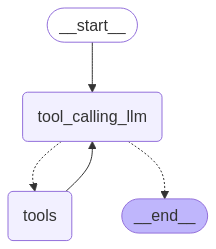

In [73]:
#Node definition
def tool_calling_llm(state:State):
    return {"messages" :[llm_bind_tools.invoke(state["messages"])]}

#Building Graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

#Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    #if latest msg (res) from assistant is a tool call tools_condition routes to tools
    #if latest msg (res) from assistant is a tool call tools_condition routes to END
    tools_condition
)
builder.add_edge("tools", "tool_calling_llm")

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))



In [74]:
messages = graph.invoke({"messages":"Greeks and Mecidonians"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Greeks and Mecidonians
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_gww4)
 Call ID: call_gww4
  Args:
    query: Greeks and Macedonians
================================= Tool Message =================================
Name: wikipedia

Page: Macedonians (Greeks)
Summary: Macedonians (Greek: Μακεδόνες, Makedónes), also known as Greek Macedonians or Macedonian Greeks, are a regional and historical population group of ethnic Greeks, inhabiting or originating  from the Greek region of Macedonia, in Northern Greece. Most Macedonians live in or around the regional capital city of Thessaloniki and other cities and towns in Macedonia (Greece), while many have spread across Greece and in the diaspora.
================================== Ai Message ==================================

The relationship between Greeks and Macedonians involves both historic

In [78]:
messages = graph.invoke({"messages":"econceptions pakistan"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

econceptions pakistan
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_3p9k)
 Call ID: call_3p9k
  Args:
    query: econceptions pakistan
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "eConceptions - 2025 Company Profile & Competitors - Tracxn", "url": "https://tracxn.com/d/companies/econceptions/__-uJqveSZorg5He-FMS-yVVeoX9ESGndVp5l1VohqPL0", "content": "eConceptions is an unfunded company based in Islamabad (Pakistan), founded in 2007. It operates as a Provider of web designing, e-commerce development and", "score": 0.88822687}, {"title": "eConceptions Information - RocketReach", "url": "https://rocketreach.co/econceptions-profile_b5cc1888f42e0a43", "content": "eConceptions is a Software Development, Membership Organizations, and Software company 

In [76]:
messages = graph.invoke({"messages":"Recent crypto news in pakistan  and then tell me about the history of digital currency?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Recent crypto news in pakistan  and then tell me about the history of digital currency?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_s955)
 Call ID: call_s955
  Args:
    query: Recent crypto news in Pakistan
  wikipedia (call_3k3x)
 Call ID: call_3k3x
  Args:
    query: history of digital currency
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Pakistan - CoinDesk", "url": "https://www.coindesk.com/tag/pakistan", "content": "Cryptocurrencies will “never be legalized in Pakistan,” said Minister of State for Finance and Revenue Aisha Ghaus Pasha.\n\nBy Amitoj SinghMay 18, 2023\n\nPakistan Mulls Crypto Future; Bitcoin’s Fed Boost\n\nPakistan to take a fresh look at cryptocurrency. Kazakhstan orders bitcoin miners to file regular status reports. Big